# SUICIDE RATE PREDICTION

Suicide is a tragic and complex public health issue that affects individuals and communities worldwide. While numerous factors contribute to suicide, a profound and often overlooked aspect is its strong connection to mental health. Understanding this connection is crucial for effective prevention and support.

In this notebook, I intend to perform analysis and predict suicide rate over the years using the WHO dataset from kaggle.

In [1]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [2]:

# Load the dataset
suicide_df = pd.read_csv('combined_processed_data.csv')


# Display the first few rows of the dataset
suicide_df.head()


,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,60-64 Years,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85+ Years,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,Africa,Cabo Verde,1980,Female,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.227273,0.000000
1,Africa,Cabo Verde,1980,Male,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.983156,0.000000
2,Africa,Cabo Verde,2011,Female,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.161273,2.395998
3,Africa,Cabo Verde,2011,Male,0.0,0.0,0.0,3.0,1.0,4.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,37.0,3.804557,28.024735
4,Africa,Egypt,1965,Female,0.0,0.0,0.0,0.0,6.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.026743,0.074515


In [3]:
suicide_df.tail()

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,60-64 Years,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85+ Years,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
9533,Oceania,New Zealand,2014,Male,0.0,0.0,0.0,2.0,27.0,41.0,...,26.0,13.0,14.0,4.0,8.0,10.0,0.0,379.0,10.703106,16.744376
9534,Oceania,New Zealand,2015,Female,0.0,0.0,0.0,4.0,25.0,16.0,...,12.0,7.0,3.0,4.0,1.0,1.0,0.0,144.0,8.828921,5.458483
9535,Oceania,New Zealand,2015,Male,0.0,0.0,0.0,5.0,32.0,38.0,...,24.0,14.0,7.0,13.0,9.0,6.0,0.0,386.0,11.143815,16.703400
9536,Oceania,New Zealand,2016,Female,0.0,0.0,0.0,3.0,10.0,16.0,...,4.0,5.0,3.0,2.0,2.0,2.0,0.0,145.0,8.362872,5.342887
9537,Oceania,New Zealand,2016,Male,0.0,0.0,0.0,5.0,34.0,52.0,...,23.0,18.0,5.0,10.0,8.0,10.0,0.0,416.0,11.974208,17.383315


In [4]:
# Now let’s have a look at all the columns/variables in the dataset:

print(suicide_df.columns)

Index(['Region Name', 'Country Name', 'Year', 'Sex', '0 Year', '1-4 Years',
       '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years',
       '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years',
       '50-54 Years', '55-59 Years', '60-64 Years', '65-69 Years',
       '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age',
       'No of Suicides',
       'Percentage of cause-specific deaths out of total deaths',
       'Death rate per 100 000 population'],
      dtype='object')


The dataset provides information about suicide rates in different countries, categorized by region, year, and gender. The columns represent:

    
Region Name: The region to which the country belongs.
    
Country Name: The name of the country.
    
Year: The year of the data.
    
Sex: Gender of the population segment (Male/Female).
    
0 Year - 85+ Years: Age group columns, indicating the number of suicides in each age group.
    
Unknown Age: Suicides where age was not specified.
    
No of Suicides: Total number of suicides for that row's criteria.
    
Percentage of cause-specific deaths out of total deaths: The percentage of deaths due to suicide compared to all causes of death.
    
Death rate per 100 000 population: The death rate due to suicide per 100,000 people.

In [5]:
# Let's check the shape of our data

suicide_df.shape

(9538, 27)

In [6]:
print("Min. Year :", suicide_df["Year"].min())

print("Max. Year :", suicide_df["Year"].max())

Min. Year : 1950
Max. Year : 2021


The "Year" column ranges from 1950 to 2021

In [7]:
# To check datatype in our dataset

suicide_df.dtypes

Region Name                                                 object
Country Name                                                object
Year                                                         int64
Sex                                                         object
0 Year                                                     float64
1-4 Years                                                  float64
5-9 Years                                                  float64
10-14 Years                                                float64
15-19 Years                                                float64
20-24 Years                                                float64
25-29 Years                                                float64
30-34 Years                                                float64
35-39 Years                                                float64
40-44 Years                                                float64
45-49 Years                                                flo

In [8]:
#checking the null values

suicide_df.isnull().sum()

Region Name                                                0
Country Name                                               0
Year                                                       0
Sex                                                        0
0 Year                                                     0
1-4 Years                                                  0
5-9 Years                                                  0
10-14 Years                                                0
15-19 Years                                                0
20-24 Years                                                0
25-29 Years                                                0
30-34 Years                                                0
35-39 Years                                                0
40-44 Years                                                0
45-49 Years                                                0
50-54 Years                                                0
55-59 Years             

There are no null values present. which is good news for the analysis.

In [9]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Region Name                                              9538 non-null   object 
 1   Country Name                                             9538 non-null   object 
 2   Year                                                     9538 non-null   int64  
 3   Sex                                                      9538 non-null   object 
 4   0 Year                                                   9538 non-null   float64
 5   1-4 Years                                                9538 non-null   float64
 6   5-9 Years                                                9538 non-null   float64
 7   10-14 Years                                              9538 non-null   float64
 8   15-19 Years                 

In [10]:
# checking number of unique values in each column


suicide_df.nunique().to_frame("No. of unique values")

,No. of unique values
Region Name,6
Country Name,118
Year,72
Sex,3
0 Year,2
1-4 Years,3
5-9 Years,20
10-14 Years,183
15-19 Years,543
20-24 Years,760


In [11]:
# statistical summary of numerical columns

suicide_df.describe()

,Year,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,25-29 Years,30-34 Years,35-39 Years,...,60-64 Years,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85+ Years,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,...,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,1992.975571,0.000315,0.002831,0.293458,8.869889,55.817677,95.690816,99.685154,99.543825,101.336968,...,81.212728,70.262634,60.524009,50.077584,35.348081,26.811176,2.628014,1206.460579,3.488967,12.724717
std,18.132420,0.017733,0.055071,1.169750,25.310618,166.000492,311.248355,326.192581,329.395647,333.373990,...,234.869418,197.290027,164.710101,135.906738,99.295089,83.145089,16.494114,3537.765167,2.968040,14.025723
min,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.180353,2.696415
50%,1996.000000,0.000000,0.000000,0.000000,2.000000,11.000000,17.000000,17.000000,17.000000,17.000000,...,13.000000,11.000000,9.000000,7.000000,4.000000,3.000000,0.000000,235.500000,2.731562,7.887129
75%,2008.000000,0.000000,0.000000,0.000000,6.000000,40.000000,60.000000,60.000000,61.000000,63.000000,...,58.000000,50.000000,42.000000,33.000000,22.000000,15.000000,0.000000,842.750000,5.193484,17.708611
max,2021.000000,1.000000,2.000000,27.000000,390.000000,2410.000000,4535.000000,4868.000000,6203.000000,6787.000000,...,3140.000000,2929.000000,2054.000000,1525.000000,1153.000000,1255.000000,432.000000,51464.000000,22.222222,91.484205


The summary statistics provide the following insights into the dataset:
    
Year: The data spans from 1950 to 2021, with a mean around 1993.

No of Suicides: The mean number of suicides is approximately 1,206, but the median is much lower at around 236, indicating a skewed distribution. The maximum number of suicides recorded is 51,464.

Also, the difference between the max and 75% is high in some column, this indictaes the presence of outliers.


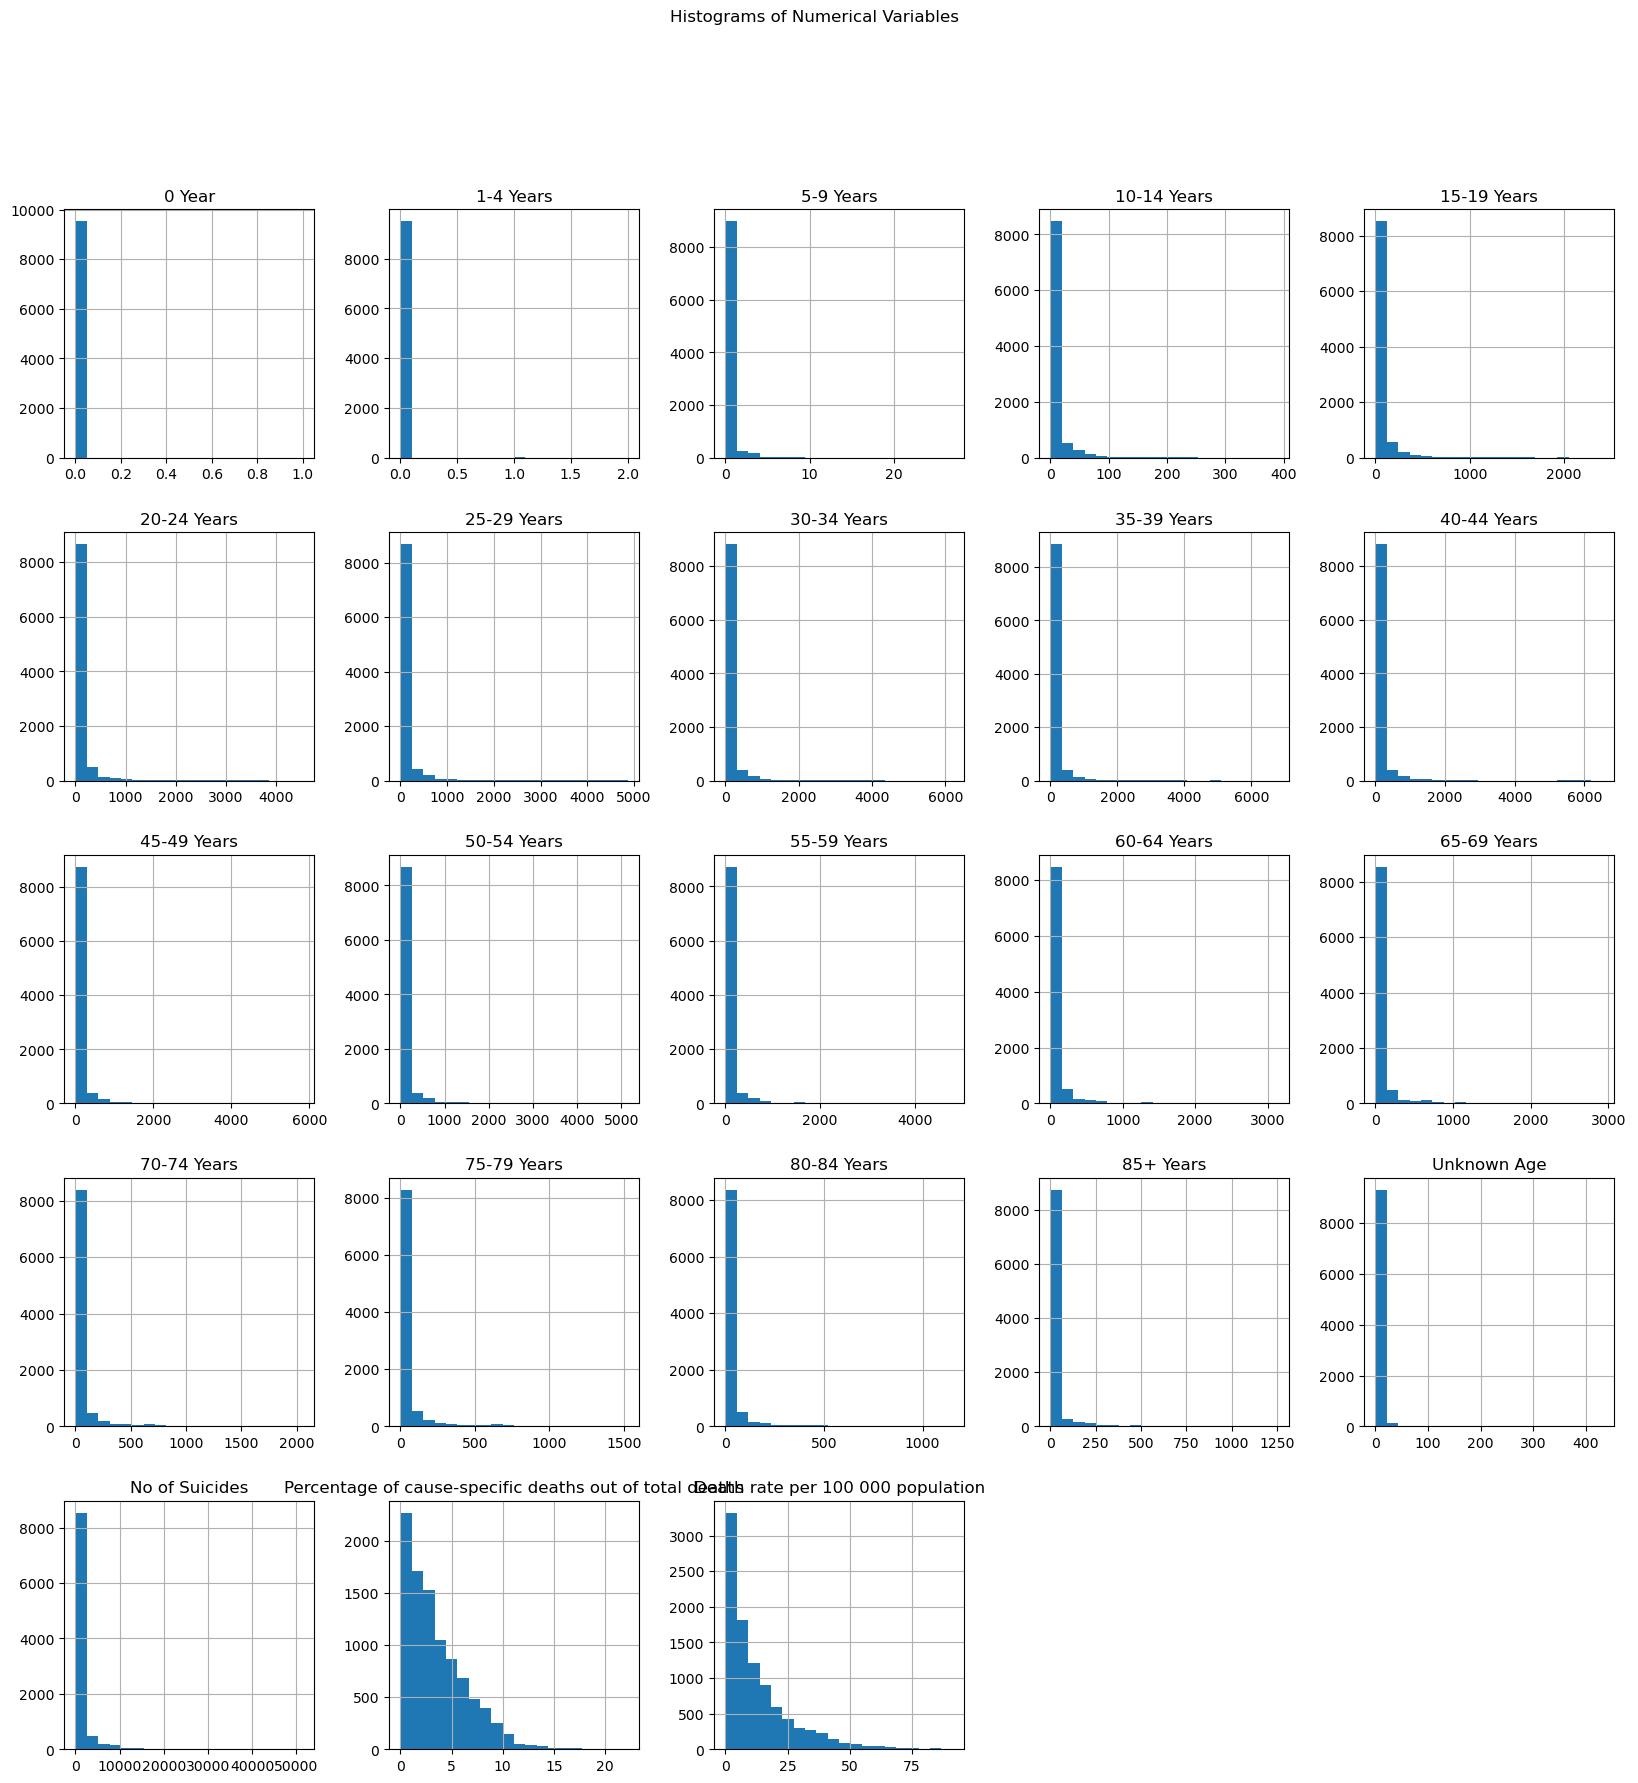

In [12]:
# Create histograms for the numerical columns
numerical_columns = ['0 Year', '1-4 Years',
       '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years',
       '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years',
       '50-54 Years', '55-59 Years', '60-64 Years', '65-69 Years',
       '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age',
       'No of Suicides',
       'Percentage of cause-specific deaths out of total deaths',
       'Death rate per 100 000 population']

suicide_df[numerical_columns].hist(figsize=(20, 20), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()


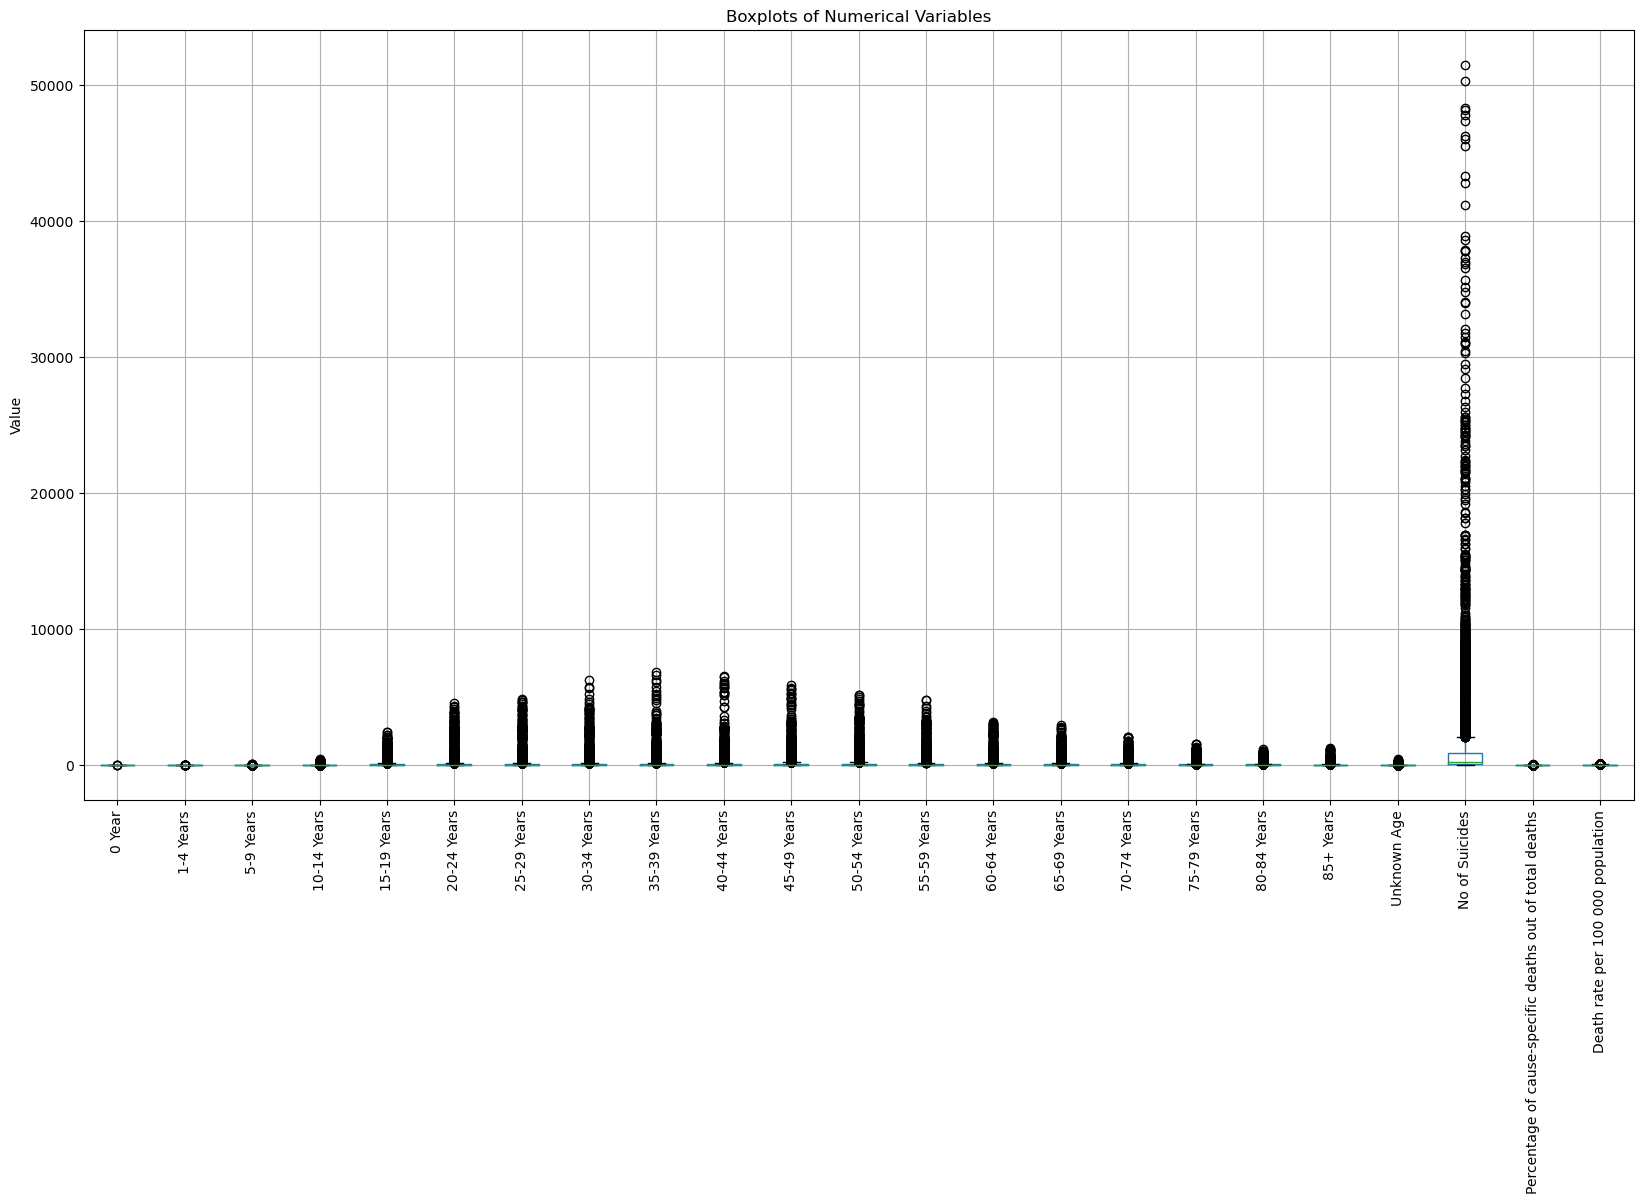

In [13]:
# Create boxplots for the numerical columns
plt.figure(figsize=(20, 10))
suicide_df.boxplot(column=numerical_columns)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables')
plt.ylabel('Value')
plt.show()



Age Groups: The mean number of suicides varies across age groups, with higher numbers generally observed in middle-age groups (e.g., 30-34, 35-39, 40-44, 45-49 years, 50-54 years).

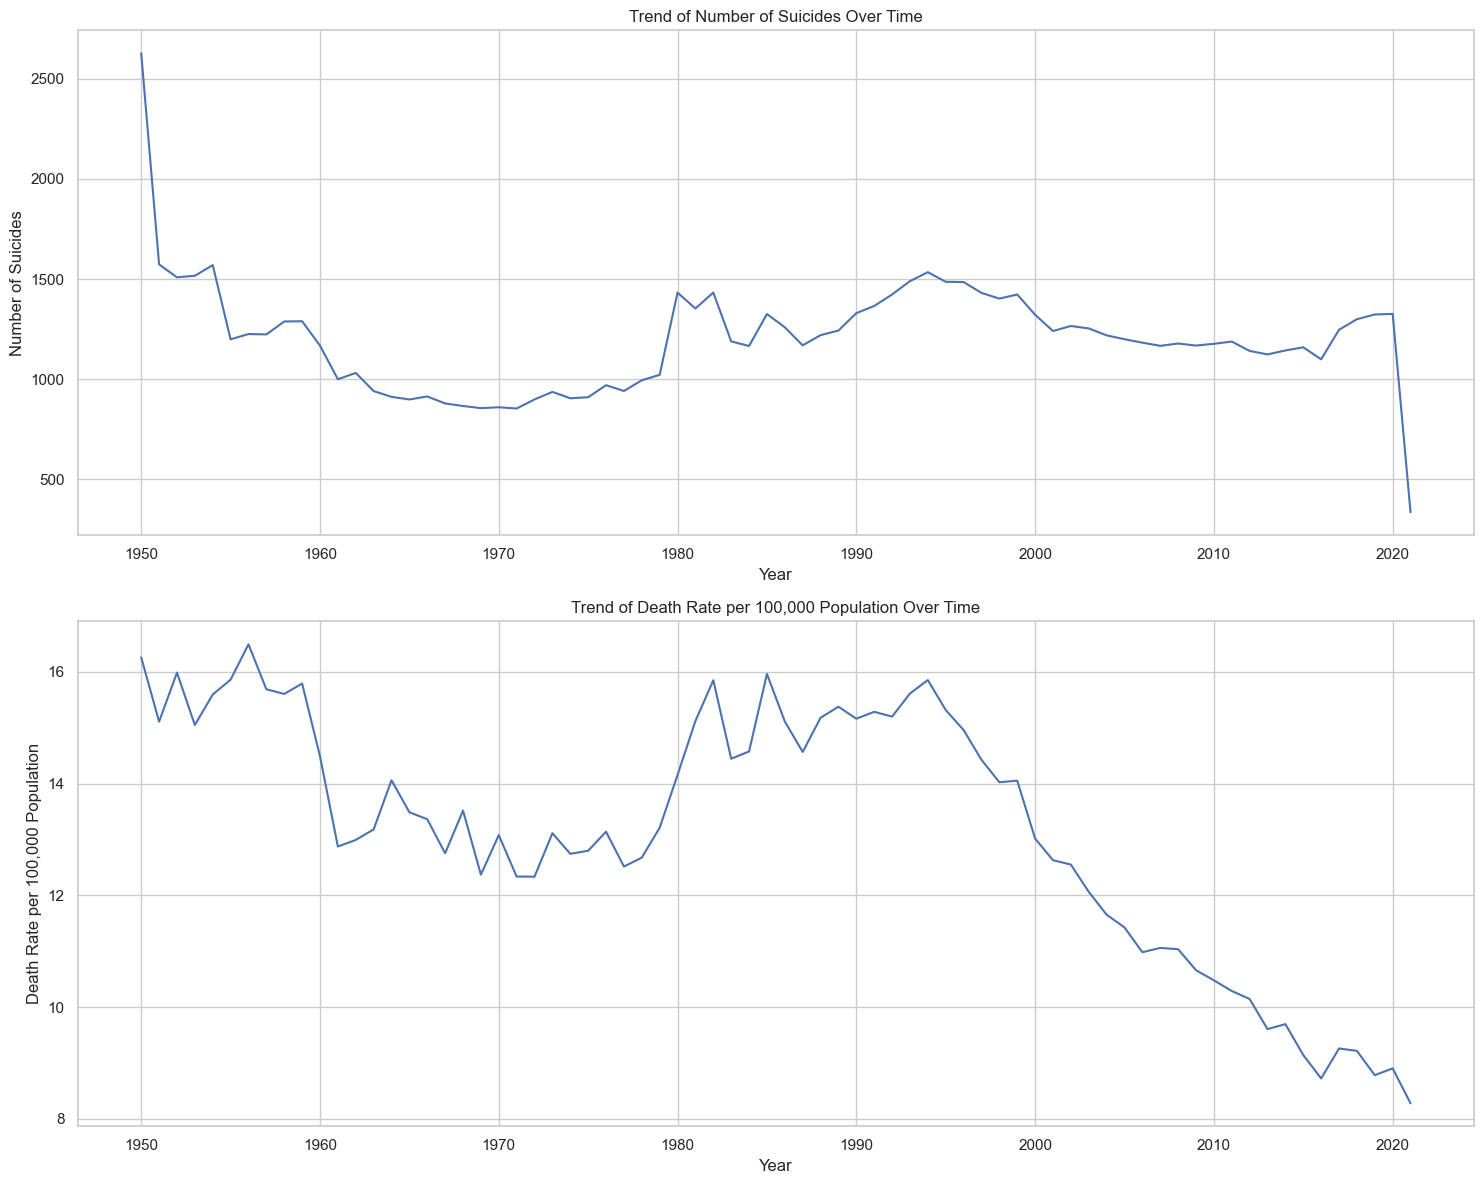

In [14]:
# Plot trends over time for the number of suicides

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and a grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x='Year', y='No of Suicides', data=suicide_df, ax=ax[0], ci=None)
ax[0].set_title('Trend of Number of Suicides Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Suicides')

# Plot trends over time for the death rate per 100,000 population
sns.lineplot(x='Year', y='Death rate per 100 000 population', data=suicide_df, ax=ax[1], ci=None)
ax[1].set_title('Trend of Death Rate per 100,000 Population Over Time')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Death Rate per 100,000 Population')

# Show the plots
plt.tight_layout()
plt.show()


Here's what we can observe from the plots:

The number of suicides appears to increase from around the 1950s up to the early 2000s, after which it shows a decreasing trend.

The death rate per 100,000 population seems to follow a similar pattern to the number of suicides, increasing initially and then decreasing after the early 2000s.

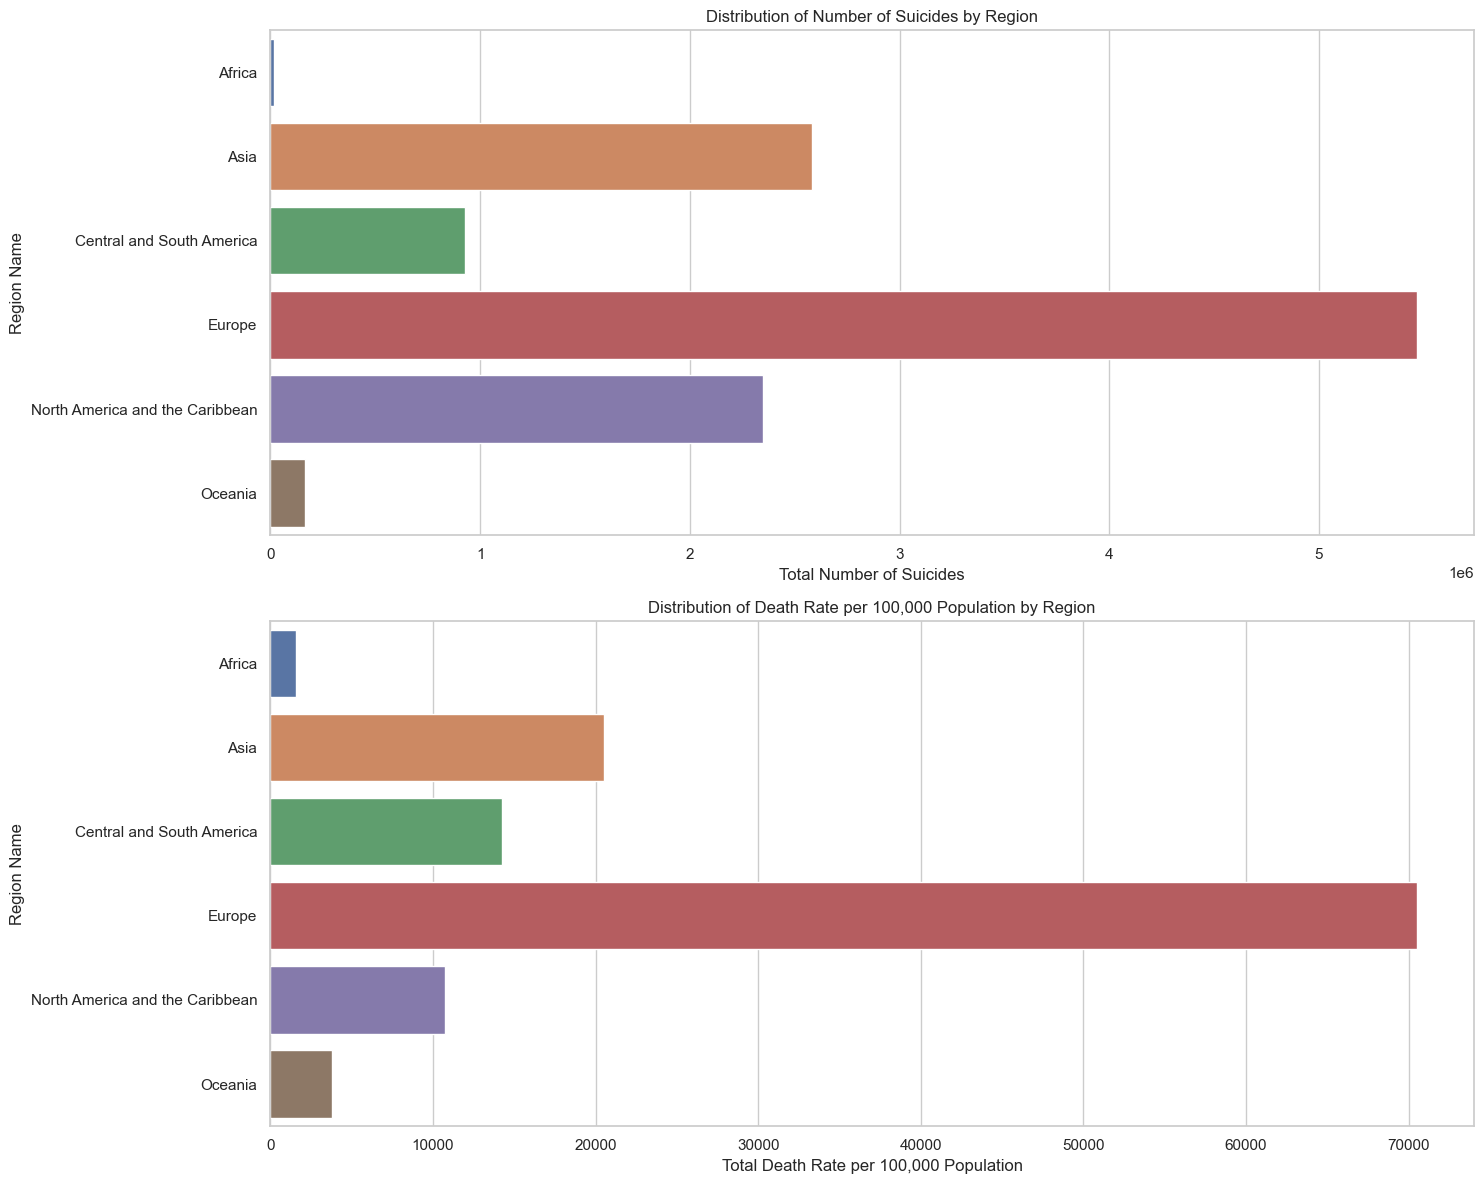

In [15]:
# Create a figure and a grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot distribution by region for the number of suicides
sns.barplot(x='No of Suicides', y='Region Name', data=suicide_df, ax=ax[0], ci=None, estimator=sum)
ax[0].set_title('Distribution of Number of Suicides by Region')
ax[0].set_xlabel('Total Number of Suicides')
ax[0].set_ylabel('Region Name')

# Plot distribution by region for the death rate per 100,000 population
sns.barplot(x='Death rate per 100 000 population', y='Region Name', data=suicide_df, ax=ax[1], ci=None, estimator=sum)
ax[1].set_title('Distribution of Death Rate per 100,000 Population by Region')
ax[1].set_xlabel('Total Death Rate per 100,000 Population')
ax[1].set_ylabel('Region Name')

# Show the plots
plt.tight_layout()
plt.show()


From the bar plots, we can make the following observations:

The highest number of suicides is observed in Europe, followed by Asia and the Americas.

Similar to the number of suicides, Europe leads in death rate per 100,000 population, followed by the Americas and Asia.

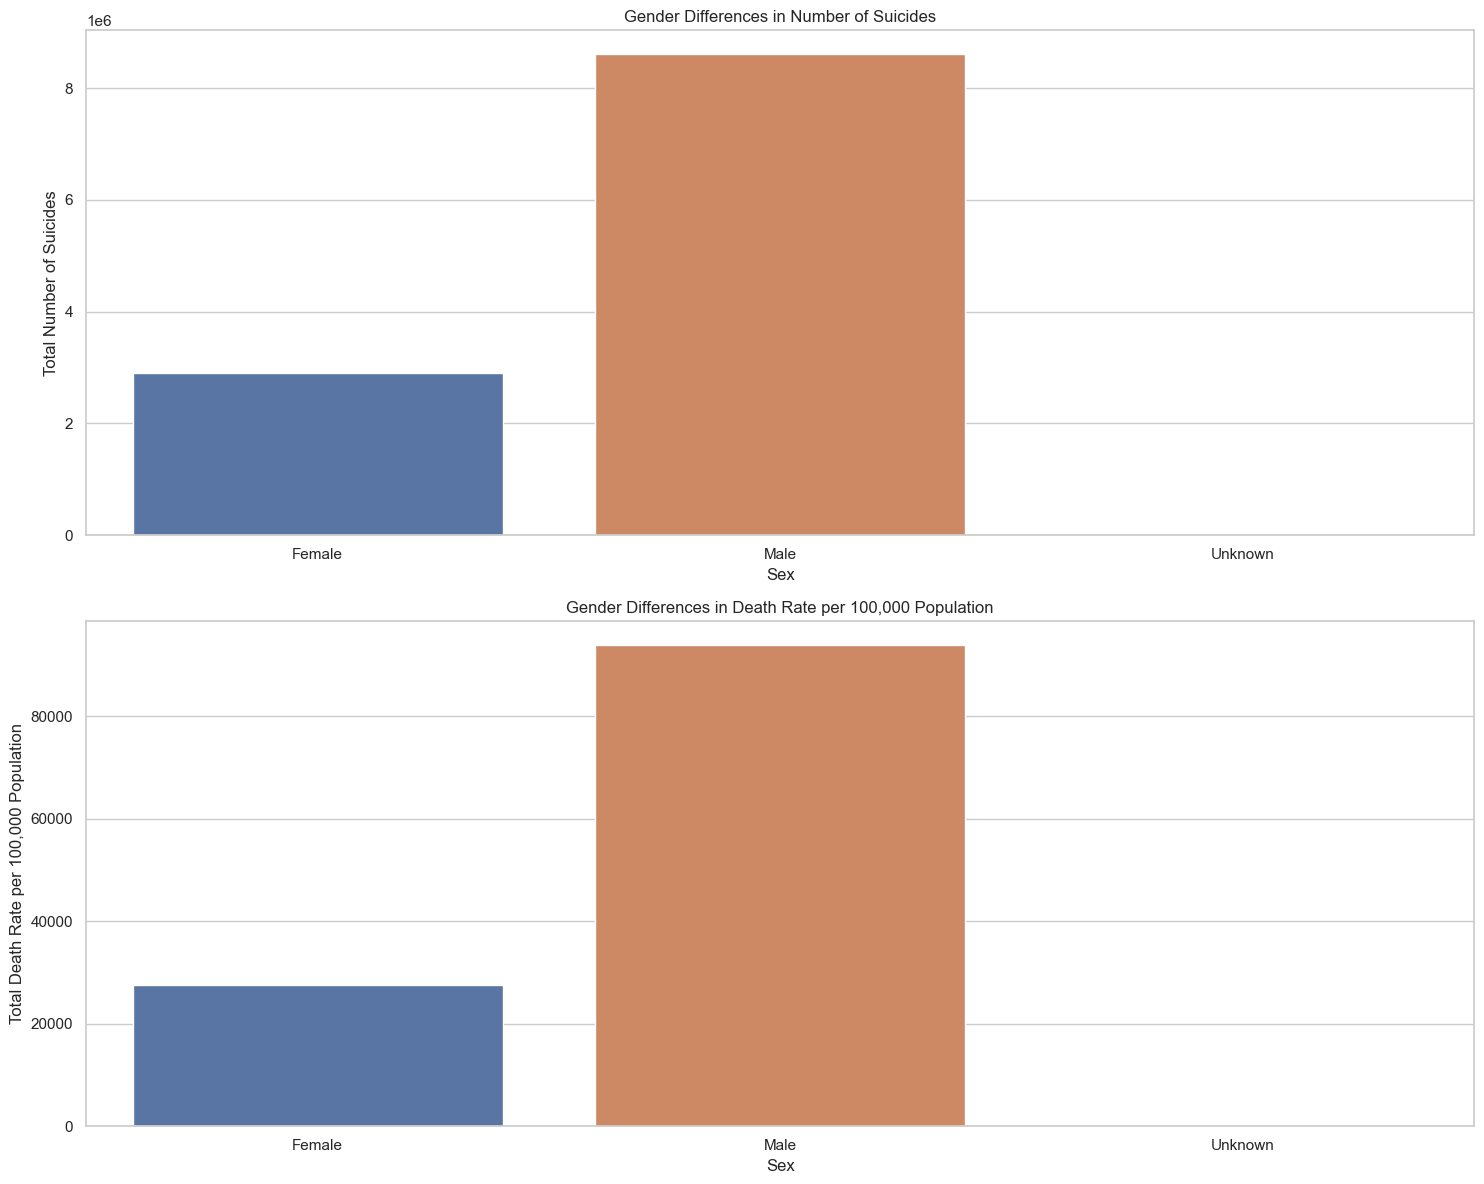

In [16]:
# Create a figure and a grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot gender differences for the number of suicides
sns.barplot(x='Sex', y='No of Suicides', data=suicide_df, ax=ax[0], ci=None, estimator=sum)
ax[0].set_title('Gender Differences in Number of Suicides')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Total Number of Suicides')

# Plot gender differences for the death rate per 100,000 population
sns.barplot(x='Sex', y='Death rate per 100 000 population', data=suicide_df, ax=ax[1], ci=None, estimator=sum)
ax[1].set_title('Gender Differences in Death Rate per 100,000 Population')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Total Death Rate per 100,000 Population')

# Show the plots
plt.tight_layout()
plt.show()


From the bar plots focusing on gender differences, we can observe:

Males have a significantly higher number of suicides compared to females.

Similar to the number of suicides, the death rate per 100,000 population is also significantly higher for males compared to females.

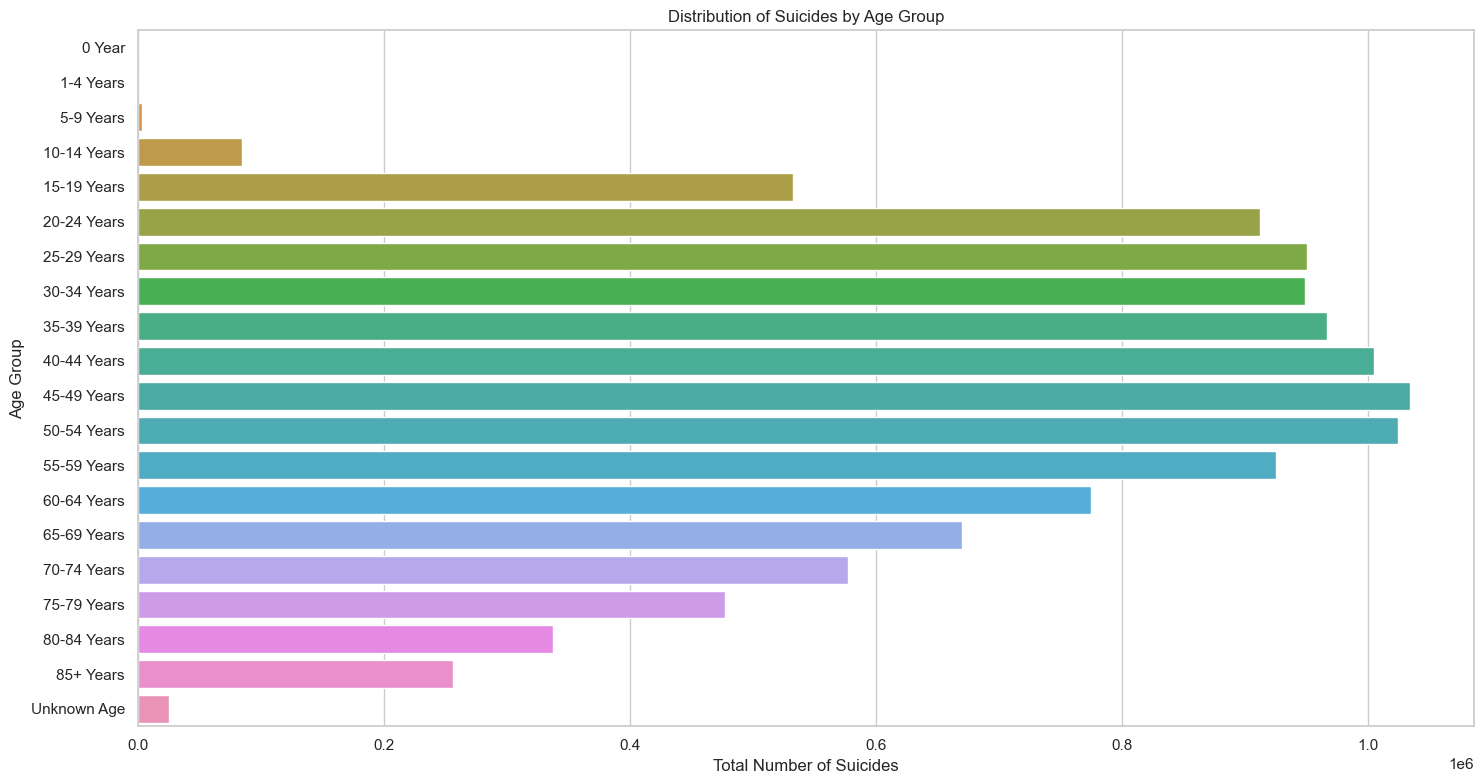

In [17]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Aggregate the suicides by age groups
age_columns = ['0 Year', '1-4 Years', '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years',
               '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years', '50-54 Years', '55-59 Years',
               '60-64 Years', '65-69 Years', '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age']
age_group_data = suicide_df[age_columns].sum().reset_index()
age_group_data.columns = ['Age Group', 'Total Suicides']

# Plot the distribution of suicides by age group
sns.barplot(x='Total Suicides', y='Age Group', data=age_group_data, ax=ax)
ax.set_title('Distribution of Suicides by Age Group')
ax.set_xlabel('Total Number of Suicides')
ax.set_ylabel('Age Group')

# Show the plot
plt.tight_layout()
plt.show()


From the bar plot focusing on age groups, we can observe:

The age groups with the highest numbers of suicides are generally those between 35-54 years.

The number of suicides decreases significantly for age groups above 75 years and is notably lower for age groups below 15 years.

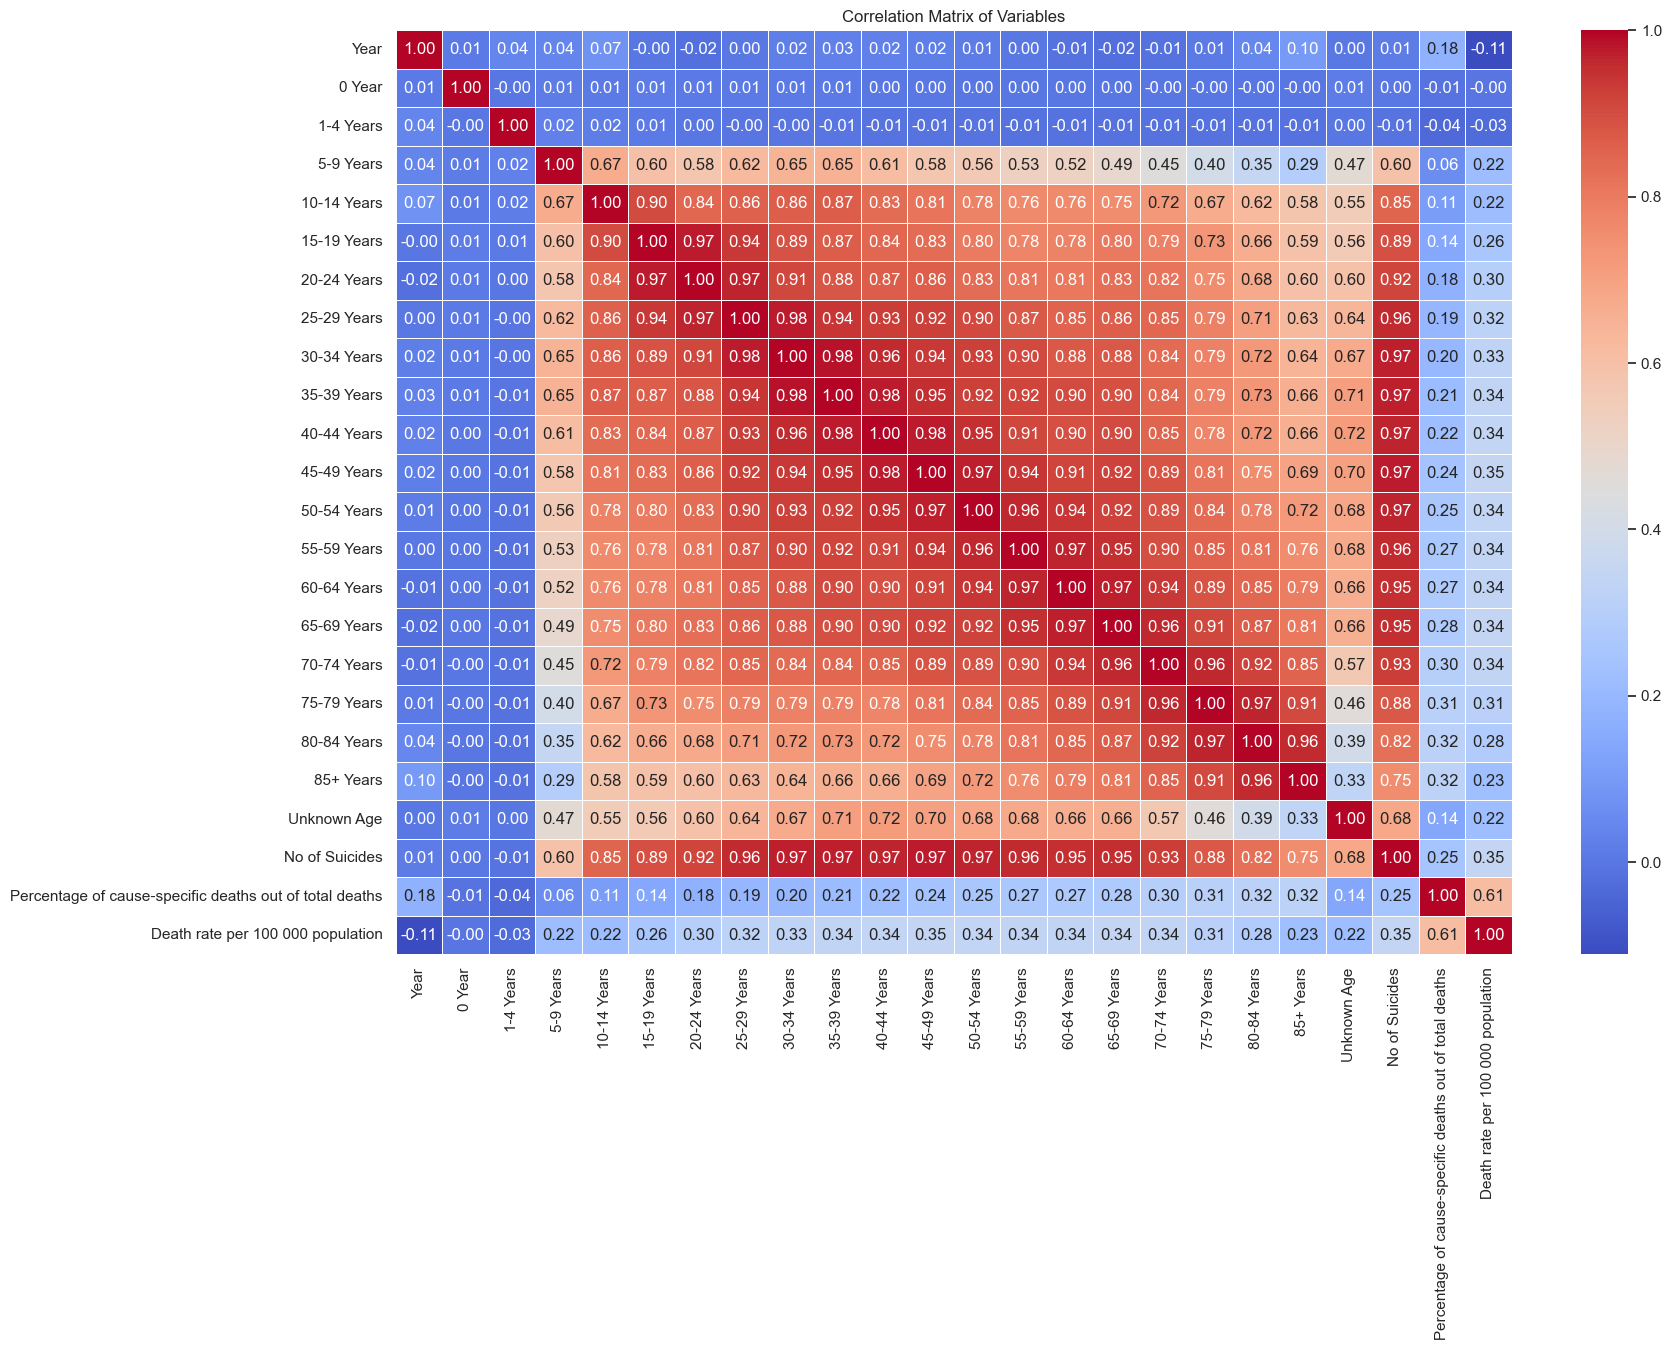

In [18]:
# Calculate the correlation matrix
correlation_matrix = suicide_df.corr()

# Create a figure for the heatmap
plt.figure(figsize=(18, 12))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix of Variables')

# Show the plot
plt.show()


The heatmap shows the correlation matrix of the numerical variables in the dataset. Here are some key takeaways:

The various age groups are moderately correlated with each other and have varying degrees of correlation with the "No of Suicides" column.

"No of Suicides" is strongly correlated with several age groups, especially those in the middle-age range (e.g., 35-54 years).

"Death rate per 100,000 population" does not show strong correlation with most of the other variables, including the "No of Suicides".

In [19]:
# how all the features correlate with No of suicides 

correlation_matrix["No of Suicides"].sort_values(ascending=False)

No of Suicides                                             1.000000
45-49 Years                                                0.974337
35-39 Years                                                0.970607
30-34 Years                                                0.970055
40-44 Years                                                0.968595
50-54 Years                                                0.966932
25-29 Years                                                0.960311
55-59 Years                                                0.957752
65-69 Years                                                0.954092
60-64 Years                                                0.950961
70-74 Years                                                0.928304
20-24 Years                                                0.917443
15-19 Years                                                0.892576
75-79 Years                                                0.876967
10-14 Years                                     

Skewness of the data:
0 Year                                                     56.367836
1-4 Years                                                  20.567691
5-9 Years                                                   8.979637
10-14 Years                                                 7.461569
15-19 Years                                                 7.337896
20-24 Years                                                 7.665152
25-29 Years                                                 8.005442
30-34 Years                                                 8.655689
35-39 Years                                                 9.199529
40-44 Years                                                 9.393011
45-49 Years                                                 8.231723
50-54 Years                                                 7.532608
55-59 Years                                                 7.188731
60-64 Years                                                 6.524918
65-69 Years 

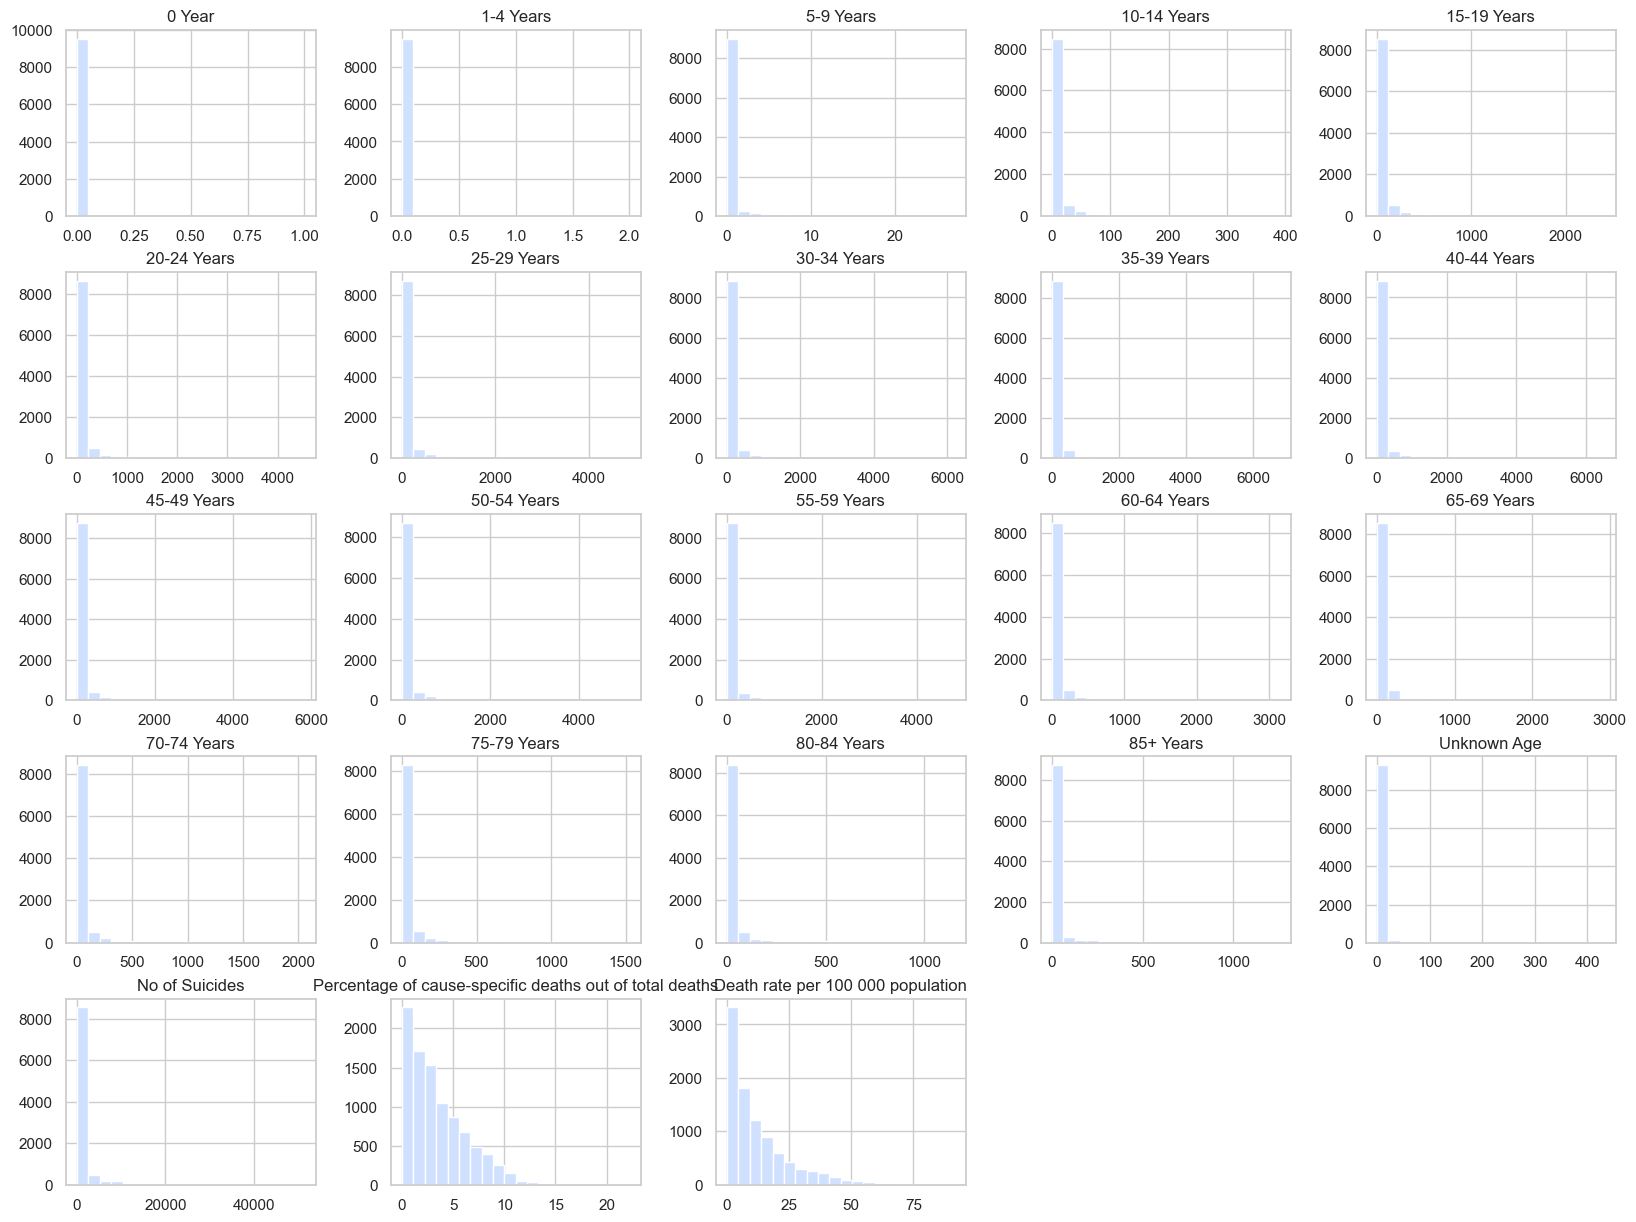

<Figure size 640x480 with 0 Axes>

In [20]:
# checking how the data has been distributed in each column

# what is the skewness of the data? (only numerical data)

numerical_columns = suicide_df[['0 Year', '1-4 Years',
       '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years',
       '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years',
       '50-54 Years', '55-59 Years', '60-64 Years', '65-69 Years',
       '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age',
       'No of Suicides',
       'Percentage of cause-specific deaths out of total deaths',
       'Death rate per 100 000 population']]
# Calculating the skewness of each column
skewness = numerical_columns.skew()

# Printing the calculated skewness values
print("Skewness of the data:")
print(skewness)

# Plotting histograms
histo_num = numerical_columns.hist(bins=20, figsize=(20, 15), color="#d0e1ff")
plt.show()

# Configuring the figure format for better quality (optional)
%config InlineBackend.figure_format='retina'

# Removing the spines (axes lines) using Seaborn (optional)
sns.despine()


In [21]:

# Apply the cube root transformation
for var in numerical_columns:
    transformed = "cbrt_" + var
    suicide_df[transformed] = np.cbrt(suicide_df[var])

# Drop the original numerical columns after transformation
df_transformed = suicide_df.drop(columns=numerical_columns)

# Show the first few rows of the transformed DataFrame
print(df_transformed.head())

  Region Name Country Name  Year     Sex  cbrt_0 Year  cbrt_1-4 Years  \
0      Africa   Cabo Verde  1980  Female          0.0             0.0   
1      Africa   Cabo Verde  1980    Male          0.0             0.0   
2      Africa   Cabo Verde  2011  Female          0.0             0.0   
3      Africa   Cabo Verde  2011    Male          0.0             0.0   
4      Africa        Egypt  1965  Female          0.0             0.0   

   cbrt_5-9 Years  cbrt_10-14 Years  cbrt_15-19 Years  cbrt_20-24 Years  ...  \
0             0.0           0.00000          1.000000          0.000000  ...   
1             0.0           0.00000          1.259921          0.000000  ...   
2             0.0           0.00000          0.000000          1.000000  ...   
3             0.0           1.44225          1.000000          1.587401  ...   
4             0.0           0.00000          1.817121          1.000000  ...   

   cbrt_60-64 Years  cbrt_65-69 Years  cbrt_70-74 Years  cbrt_75-79 Years  \
0  

In [22]:
df_transformed.columns

Index(['Region Name', 'Country Name', 'Year', 'Sex', 'cbrt_0 Year',
       'cbrt_1-4 Years', 'cbrt_5-9 Years', 'cbrt_10-14 Years',
       'cbrt_15-19 Years', 'cbrt_20-24 Years', 'cbrt_25-29 Years',
       'cbrt_30-34 Years', 'cbrt_35-39 Years', 'cbrt_40-44 Years',
       'cbrt_45-49 Years', 'cbrt_50-54 Years', 'cbrt_55-59 Years',
       'cbrt_60-64 Years', 'cbrt_65-69 Years', 'cbrt_70-74 Years',
       'cbrt_75-79 Years', 'cbrt_80-84 Years', 'cbrt_85+ Years',
       'cbrt_Unknown Age', 'cbrt_No of Suicides',
       'cbrt_Percentage of cause-specific deaths out of total deaths',
       'cbrt_Death rate per 100 000 population'],
      dtype='object')

In [23]:
# Select relevant features and target variable

features = ['Region Name', 'Country Name', 'Year', 'Sex', 'cbrt_5-9 Years', 'cbrt_10-14 Years',
       'cbrt_15-19 Years', 'cbrt_20-24 Years', 'cbrt_25-29 Years',
       'cbrt_30-34 Years', 'cbrt_35-39 Years', 'cbrt_40-44 Years',
       'cbrt_45-49 Years', 'cbrt_50-54 Years', 'cbrt_55-59 Years',
       'cbrt_60-64 Years', 'cbrt_65-69 Years', 'cbrt_70-74 Years',
       'cbrt_75-79 Years', 'cbrt_80-84 Years', 'cbrt_85+ Years',
       'cbrt_Unknown Age', 'cbrt_No of Suicides',
       'cbrt_Percentage of cause-specific deaths out of total deaths',
       'cbrt_Death rate per 100 000 population'] 

target = 'No of Suicides'

# Create the feature and target dataframes
X = suicide_df[features]
y = suicide_df[target]


# Display the first few rows of features and target
X.head(), y.head()

(  Region Name Country Name  Year     Sex  cbrt_5-9 Years  cbrt_10-14 Years  \
 0      Africa   Cabo Verde  1980  Female             0.0           0.00000   
 1      Africa   Cabo Verde  1980    Male             0.0           0.00000   
 2      Africa   Cabo Verde  2011  Female             0.0           0.00000   
 3      Africa   Cabo Verde  2011    Male             0.0           1.44225   
 4      Africa        Egypt  1965  Female             0.0           0.00000   
 
    cbrt_15-19 Years  cbrt_20-24 Years  cbrt_25-29 Years  cbrt_30-34 Years  \
 0          1.000000          0.000000          0.000000           0.00000   
 1          1.259921          0.000000          0.000000           0.00000   
 2          0.000000          1.000000          0.000000           0.00000   
 3          1.000000          1.587401          1.709976           1.44225   
 4          1.817121          1.000000          0.000000           1.00000   
 
    ...  cbrt_60-64 Years  cbrt_65-69 Years  cbrt_70-7

Encoding the categorical variables ("Region Name," "Country Name," "Year," and "Sex") using one-hot encoding. 

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Columns to be one-hot encoded
categorical_cols = ['Region Name', 'Country Name', 'Year', 'Sex']

# Initialize the one-hot encoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Apply the one-hot encoder using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('col', encoder, categorical_cols)],
    remainder='passthrough')

# Apply the column transformer to the features
X_encoded = preprocessor.fit_transform(X)

# Show the shape of encoded features
X_encoded.shape


(9538, 216)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_encoded))


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Show the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7153, 216), (2385, 216), (7153,), (2385,))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso

# Initialize the models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boost = GradientBoostingRegressor(random_state=42)
ridge_reg = Ridge(random_state=42)
lasso_reg = Lasso(random_state=42)

# Dictionary to store model performance metrics
model_metrics = {}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_metrics[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    return mse, mae, r2

# Evaluate Linear Regression
linear_mse, linear_mae, linear_r2 = evaluate_model(linear_reg, X_train, y_train, X_test, y_test, 'Linear Regression')

# Evaluate Random Forest
rf_mse, rf_mae, rf_r2 = evaluate_model(random_forest, X_train, y_train, X_test, y_test, 'Random Forest')

# Evaluate Gradient Boosting
gb_mse, gb_mae, gb_r2 = evaluate_model(gradient_boost, X_train, y_train, X_test, y_test, 'Gradient Boosting')

# Display the evaluation metrics for each model
model_metrics


{'Linear Regression': {'MSE': 1305823.01669689,
  'MAE': 663.9218979297694,
  'R2': 0.8865106780076865},
 'Random Forest': {'MSE': 5804.986922348009,
  'MAE': 6.462415094339624,
  'R2': 0.9994954875036144},
 'Gradient Boosting': {'MSE': 1835.5974081188074,
  'MAE': 15.10545424049447,
  'R2': 0.9998404678868158}}

In [29]:
# Make predictions using the Linear Regression model
y_pred = linear_reg.predict(X_test)

# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Show the first few rows of the comparison dataframe
comparison_df.head()

,Actual,Predicted
5404,15.0,-270.210938
5857,271.0,-274.210938
8275,1.0,-74.507812
1578,113.0,-467.203125
6338,91.0,-371.335938


In [30]:
# Make predictions using the Linear Regression model
y_pred = random_forest.predict(X_test)

# Create a dataframe to compare actual and predicted values
comparison_df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Show the first few rows of the comparison dataframe
comparison_df1.head()


,Actual,Predicted
5404,15.0,15.00
5857,271.0,270.99
8275,1.0,1.00
1578,113.0,113.01
6338,91.0,90.96


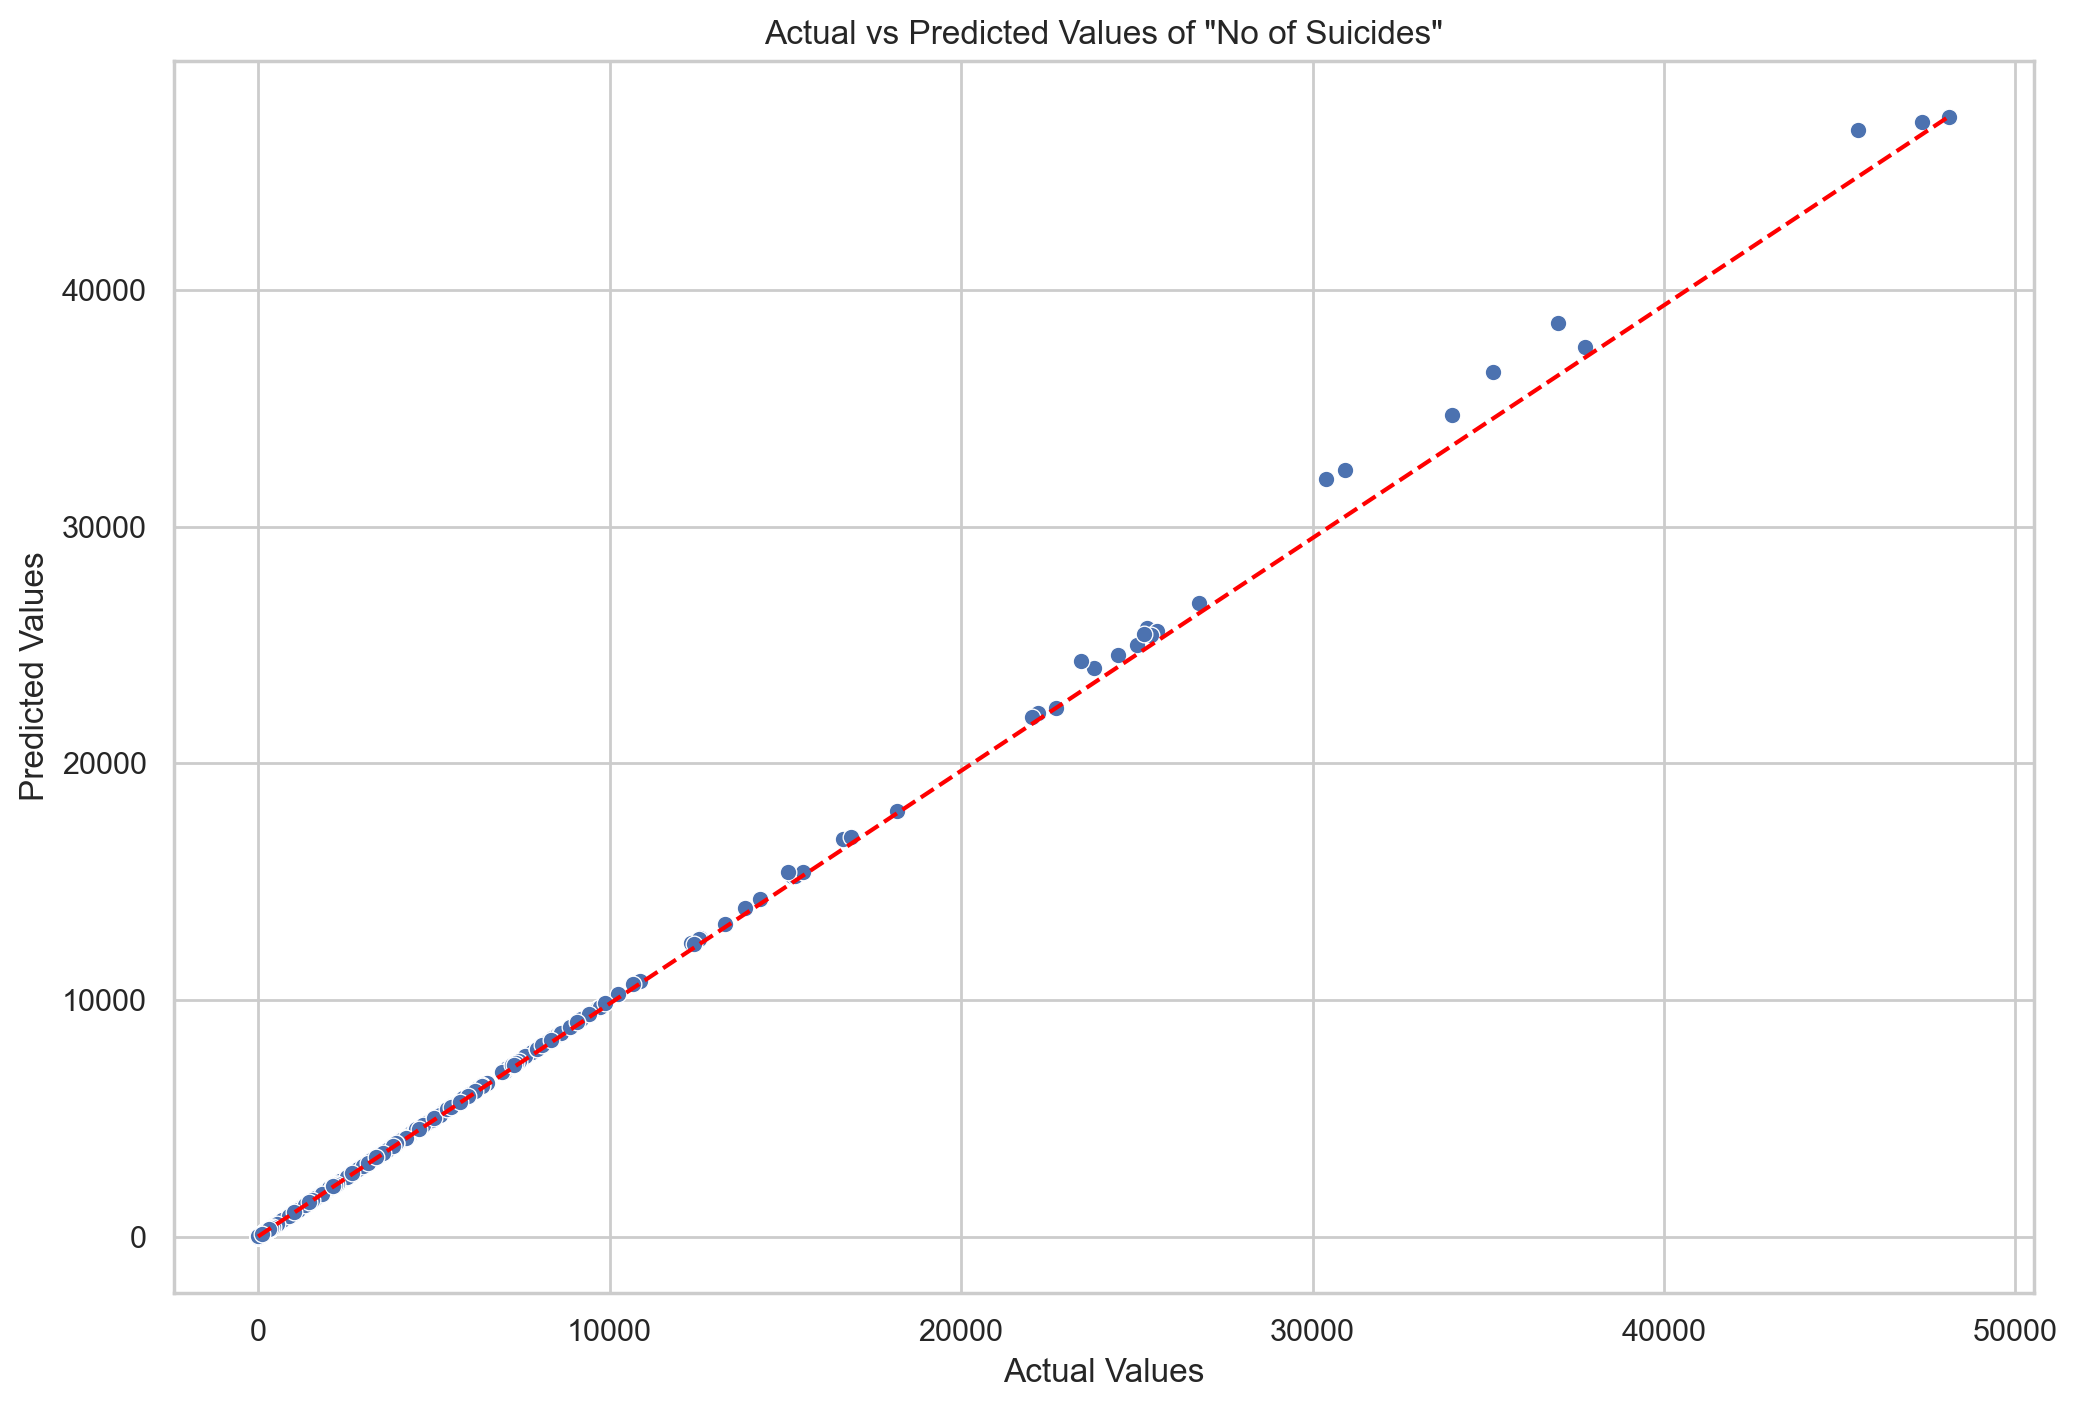

In [31]:
# Create a plot to compare actual and predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df1)
plt.title('Actual vs Predicted Values of "No of Suicides"')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--')
plt.show()


In [32]:
# Make predictions using the Gradient Boosting model
y_pred = gradient_boost.predict(X_test)

# Create a dataframe to compare actual and predicted values
comparison_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Show the first few rows of the comparison dataframe
comparison_df2.head()


,Actual,Predicted
5404,15.0,14.698692
5857,271.0,258.181618
8275,1.0,3.152533
1578,113.0,110.526547
6338,91.0,92.002644


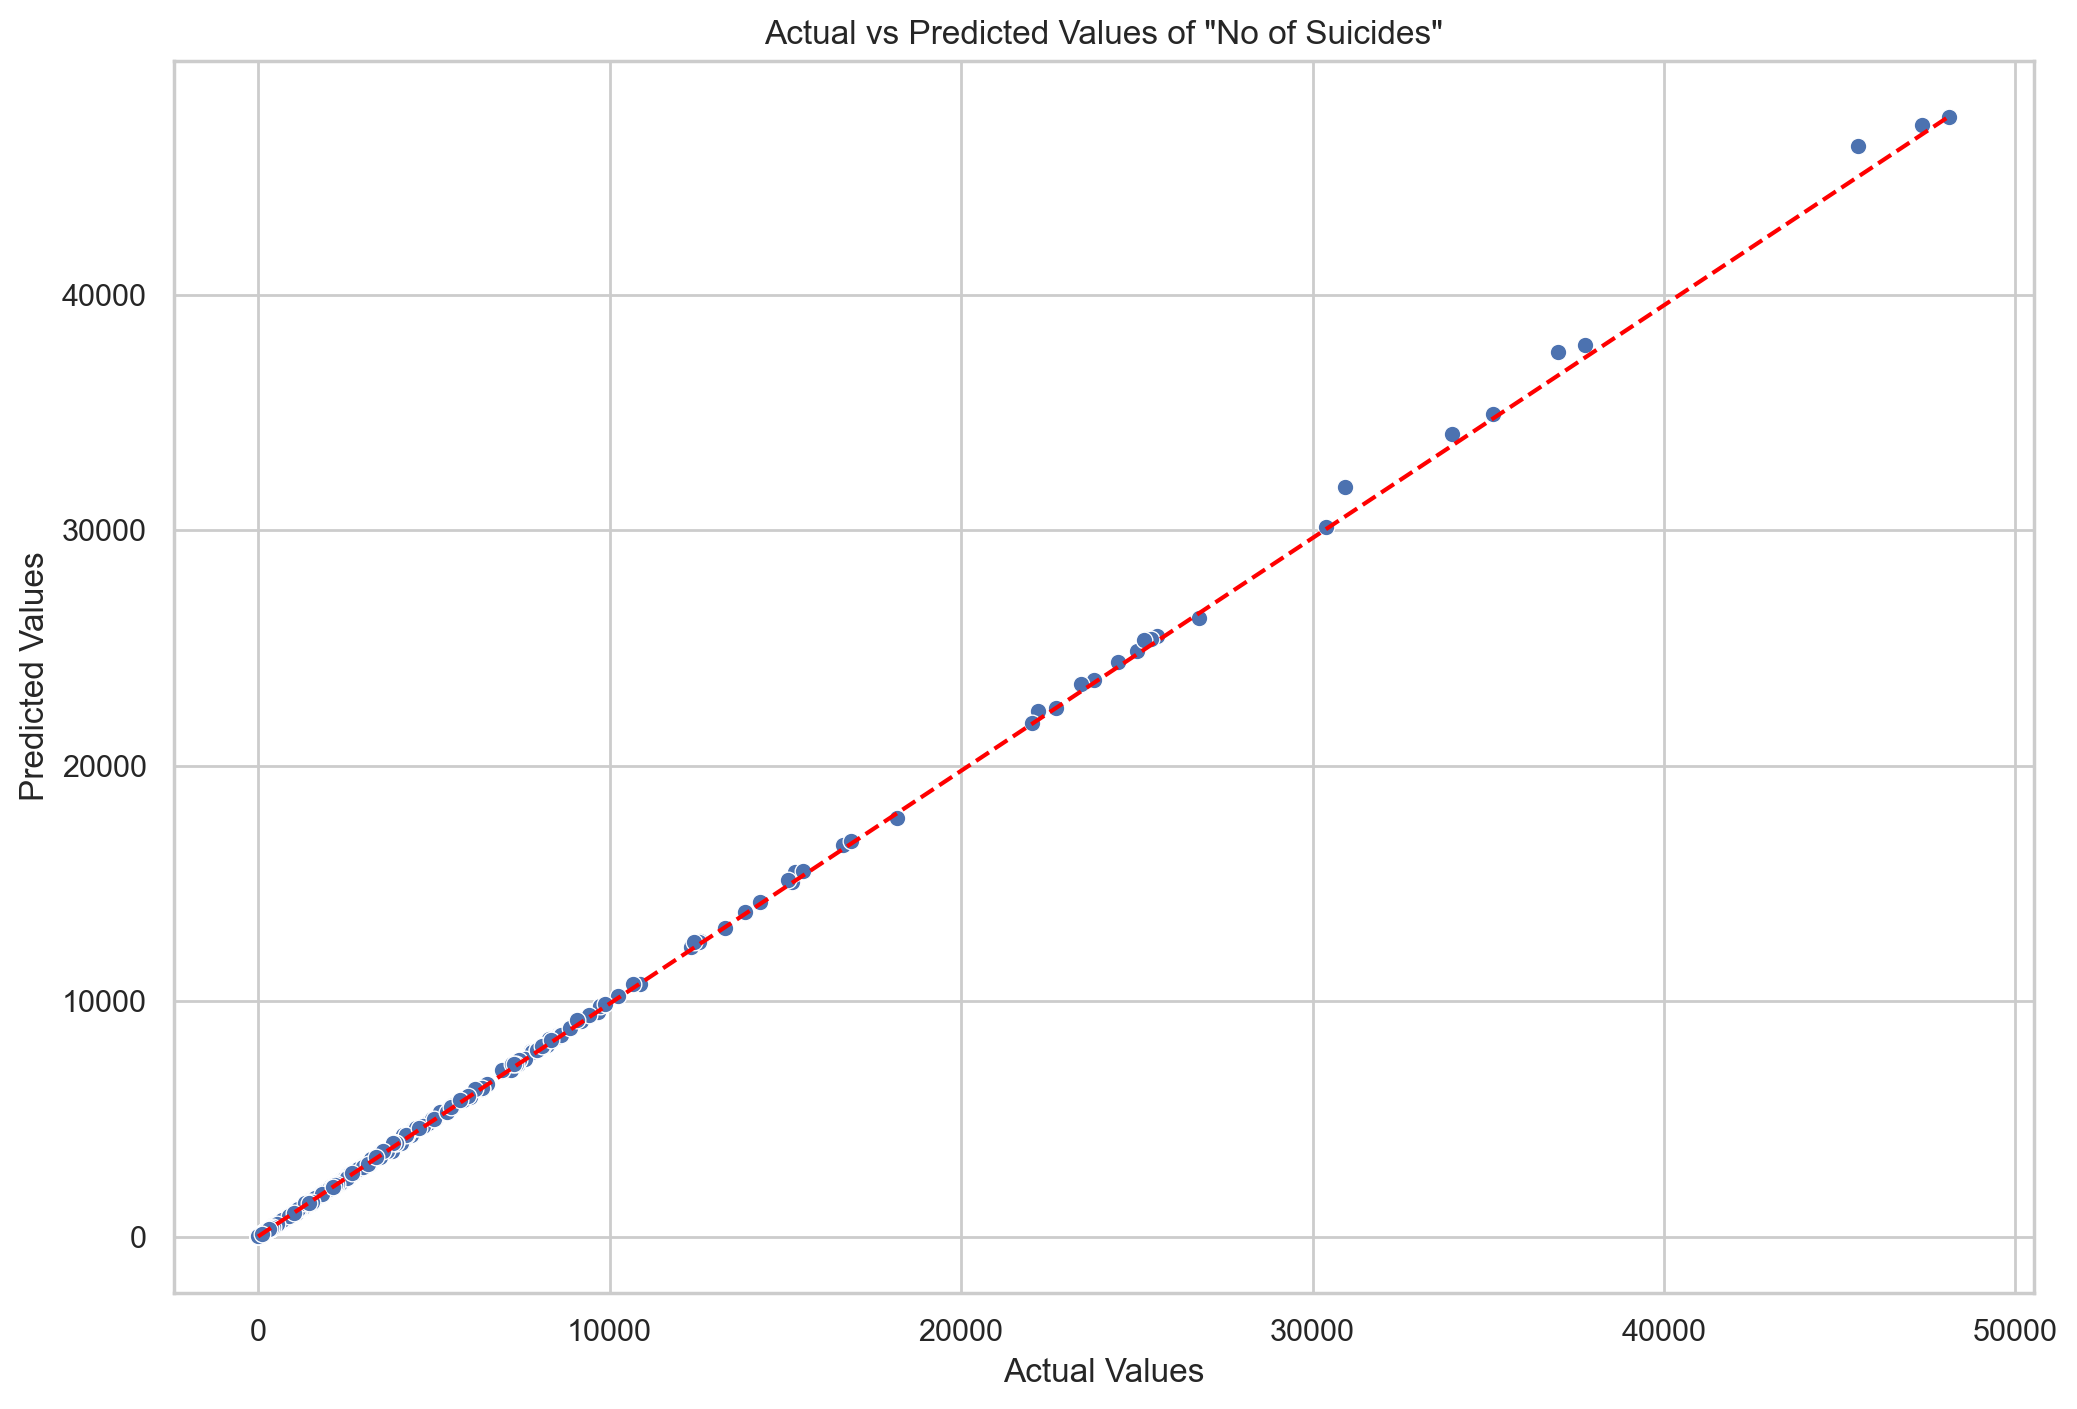

In [33]:
# Create a plot to compare actual and predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df2)
plt.title('Actual vs Predicted Values of "No of Suicides"')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--')
plt.show()


Summary:

Both The Random Forest and Gradient Boosting models show extremely high R2 scores and very low error metrics, they seems to be the best model. But Linear Regression model on the other hand, did not perform as well, with a lower 
R2 score and higher error metrics.